In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
import matplotlib.pyplot as plt
from statsmodels.tsa.forecasting.theta import ThetaModel

In [2]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()

Treino de 10 até 128
Treino de 128 até 33


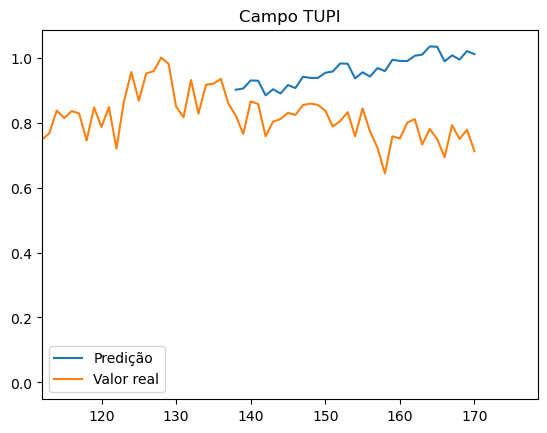

Treino de 10 até 120
Treino de 120 até 30


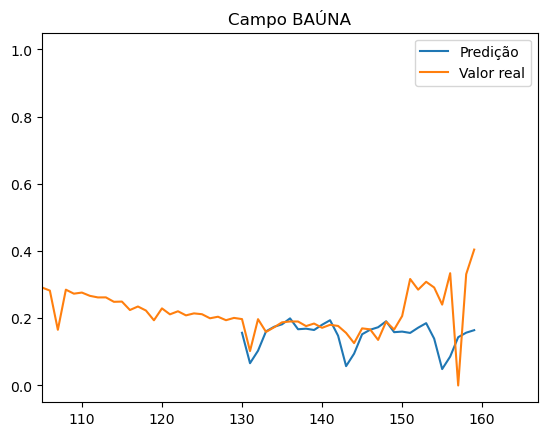

Treino de 10 até 116
Treino de 116 até 30


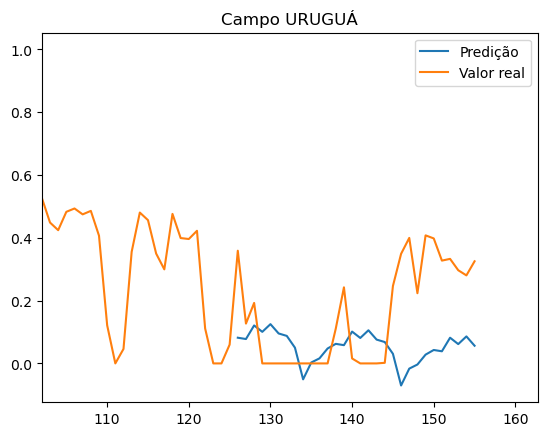

Treino de 10 até 100
Treino de 100 até 26


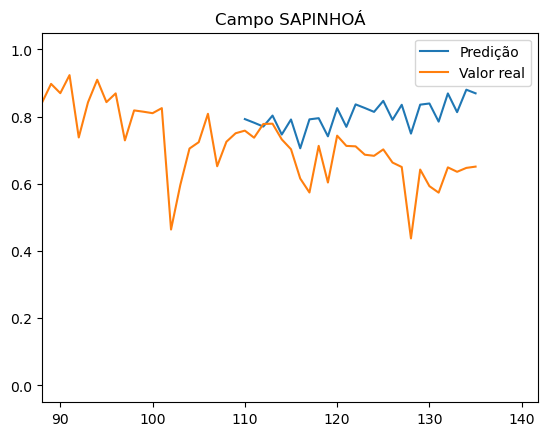

Treino de 10 até 109
Treino de 109 até 28


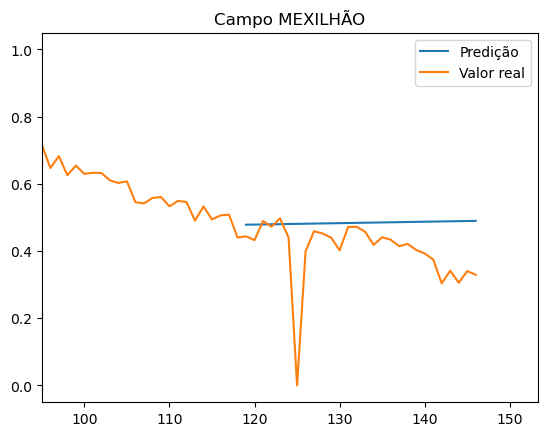

Treino de 10 até 71
Treino de 71 até 18


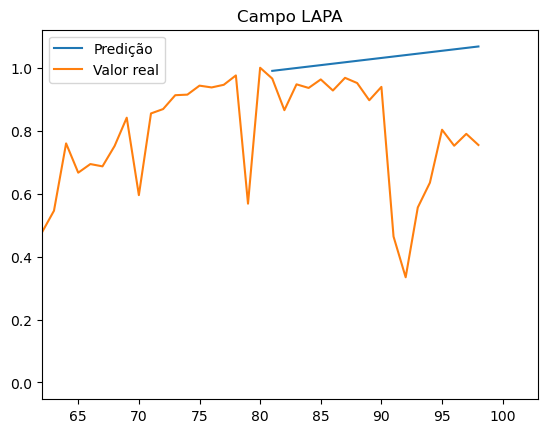

Treino de 10 até 97
Treino de 97 até 25


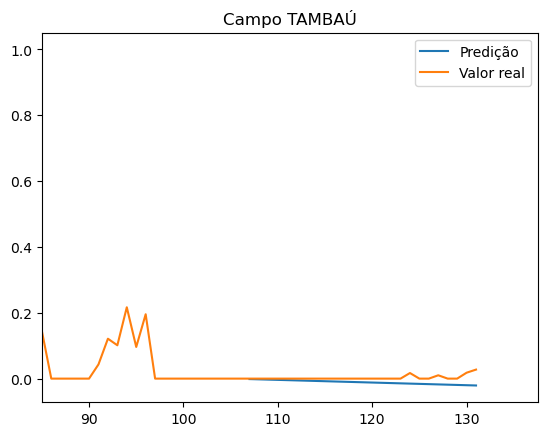

Treino de 10 até 84
Treino de 84 até 22


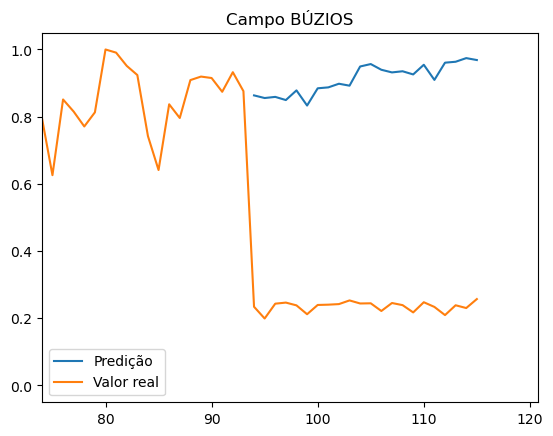

Treino de 10 até 80
Treino de 80 até 21


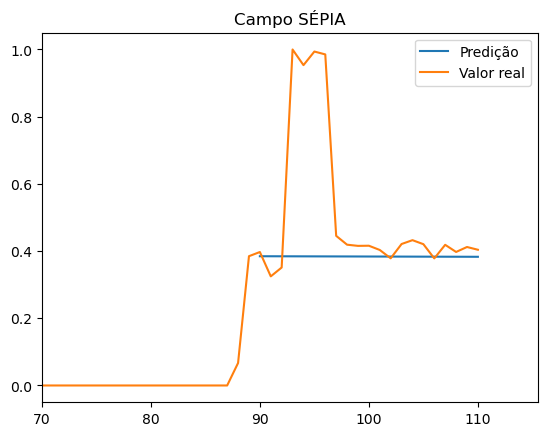

Treino de 10 até 79
Treino de 79 até 20


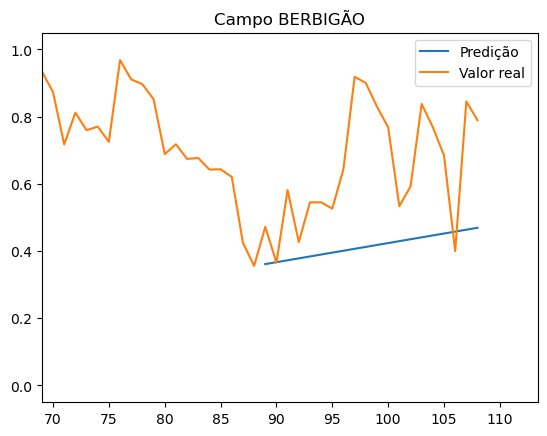

Treino de 10 até 59
Treino de 59 até 15


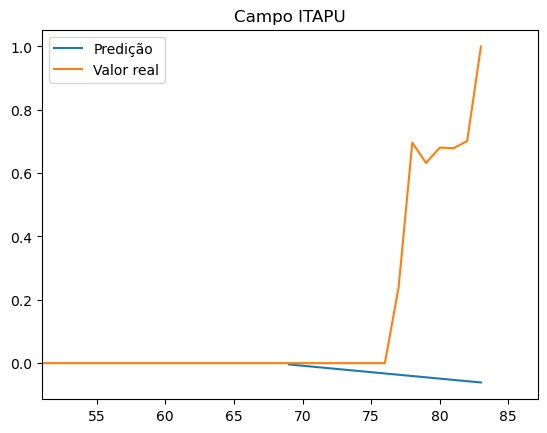

Treino de 10 até 71
Treino de 71 até 18


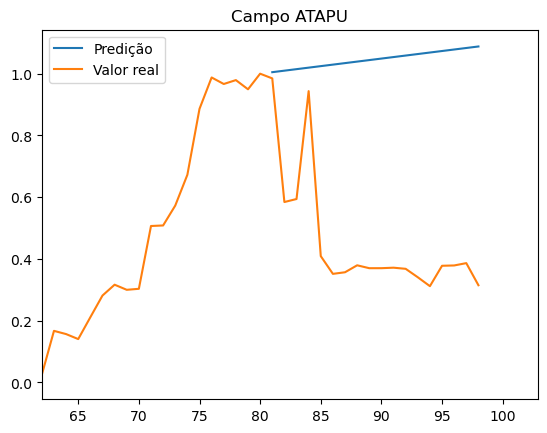

Treino de 10 até 47
Treino de 47 até 12


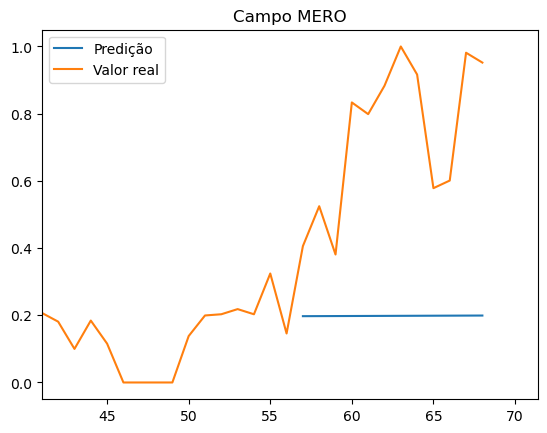

Treino de 10 até 44
Treino de 44 até 12


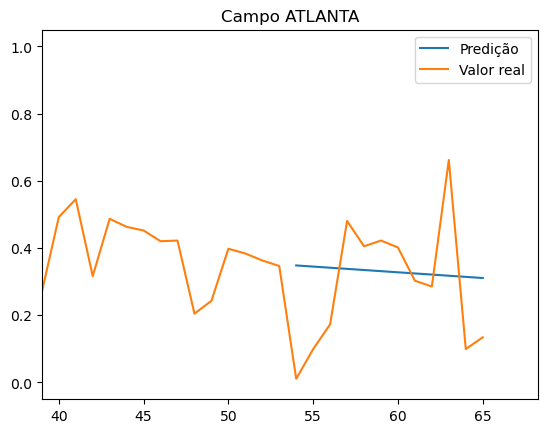

Treino de 10 até 36
Treino de 36 até 10


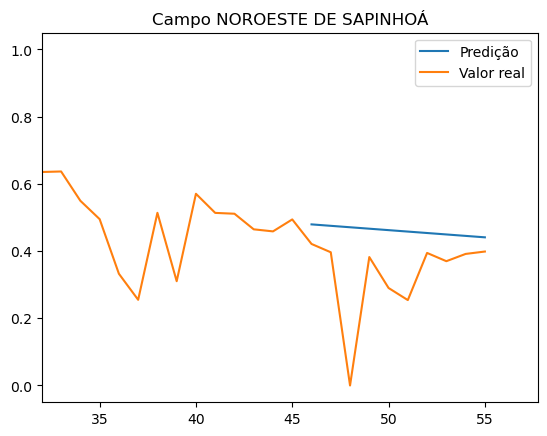

Treino de 10 até 36
Treino de 36 até 10


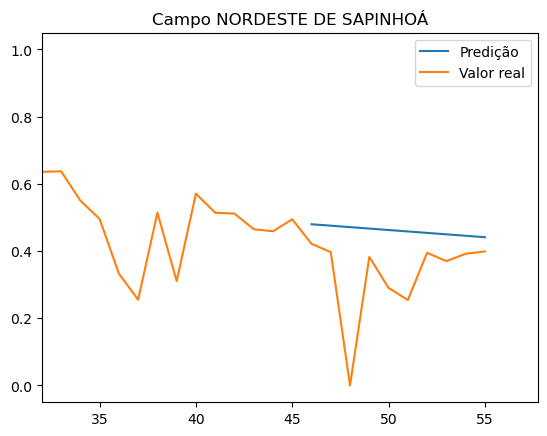

Treino de 10 até 36
Treino de 36 até 10


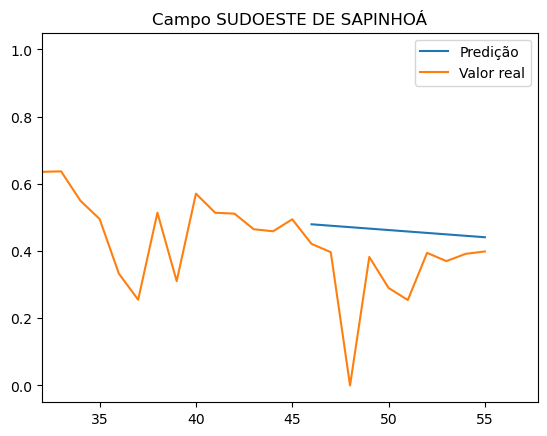

Treino de 10 até 34
Treino de 34 até 9


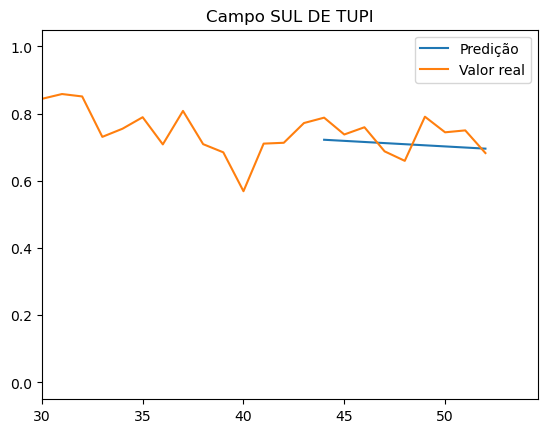

Treino de 10 até 32
Treino de 32 até 9


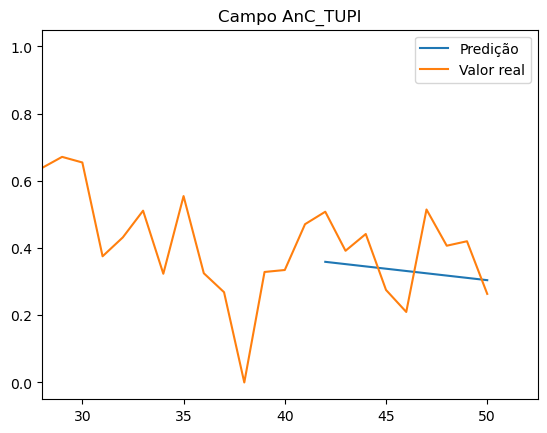

Treino de 10 até 28
Treino de 28 até 7


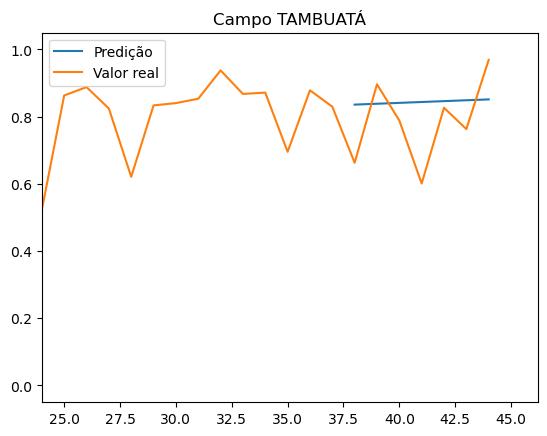

In [15]:
resultados = {
    'campo':[] ,
    #'idx_treino':[] ,
    #'idx_teste': [] ,
    'preds': [] ,
    'y_test':[] ,
    #'modelo': []
}

for campo in pipe.keys():
    #campo = 'TUPI'
    linhas = pipe[campo][0][10:,-1].shape[0]
    y_train = pipe[campo][0][10: 10+int(0.8 * linhas),-1]

    #print(f"Treino de {10} até {int(0.8 * linhas)}")

    tm = ThetaModel(y_train , deseasonalize=True, period = 12, method='additive')
    res = tm.fit()

    y_test = pipe[campo][0][10+int(0.8 * linhas): ,-1]
    #print(f"Treino de {int(0.8 * linhas)} até {len(y_test)}")

    y_pred = res.forecast( len(y_test) )

    #Plot of real values and forecasting
    plt.plot(y_pred.index + 10, y_pred, label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(linhas * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['preds'].append( y_pred.values )
    resultados['y_test'].append( y_test )


In [1]:
resultados_theta=pd.DataFrame(resultados)

NameError: name 'pd' is not defined

In [17]:
resultados_theta

,campo,preds,y_test
0,TUPI,"[0.9010105553593716, 0.9048100652866091, 0.929...","[0.8214066534253689, 0.7647913774854848, 0.865..."
1,BAÚNA,"[0.15684108965136967, 0.06626574762800608, 0.1...","[0.1975508185171136, 0.10235965707566395, 0.19..."
2,URUGUÁ,"[0.08185402361764017, 0.07768720692640067, 0.1...","[0.3589638811011853, 0.12684957803800515, 0.19..."
3,SAPINHOÁ,"[0.7928371329480706, 0.7820554212863803, 0.770...","[0.7584455110898232, 0.7374497783545088, 0.778..."
4,MEXILHÃO,"[0.4784550454357874, 0.4788792755897778, 0.479...","[0.44390206904052504, 0.432519340906554, 0.489..."
5,LAPA,"[0.9900837836022984, 0.9946422178976058, 0.999...","[0.9655466459597909, 0.8651958259139064, 0.947..."
6,TAMBAÚ,"[-0.0013922881128238176, -0.002202623664559398...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,BÚZIOS,"[0.8633496750241217, 0.8554916773447881, 0.858...","[0.23425834000279713, 0.19933104240630184, 0.2..."
8,SÉPIA,"[0.3846450699898681, 0.3845630796234459, 0.384...","[0.39721008887005116, 0.3247225642260197, 0.35..."
9,BERBIGÃO,"[0.36126974630781283, 0.366957112335307, 0.372...","[0.4721462905503638, 0.3657926517014161, 0.581..."


In [18]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i][0])
    predicted = np.append(predicted, resultados['preds'][i][0])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.1898002844407503
MAE: 0.11889188179373807
MSE: 0.03602414797378972


In [19]:
resultados_theta['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_theta.iterrows()]
resultados_theta['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_theta.iterrows()]
resultados_theta['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_theta.iterrows()]

resultados_theta['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_theta.iterrows()]
resultados_theta['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_theta.iterrows()]
resultados_theta['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_theta.iterrows()]

In [20]:
resultados_theta

,campo,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
0,TUPI,"[0.9010105553593716, 0.9048100652866091, 0.929...","[0.8214066534253689, 0.7647913774854848, 0.865...",0.035718,0.188993,0.172005,0.006337,0.079604,0.079604
1,BAÚNA,"[0.15684108965136967, 0.06626574762800608, 0.1...","[0.1975508185171136, 0.10235965707566395, 0.19...",0.010415,0.102052,0.069320,0.001657,0.040710,0.040710
2,URUGUÁ,"[0.08185402361764017, 0.07768720692640067, 0.1...","[0.3589638811011853, 0.12684957803800515, 0.19...",0.041200,0.202979,0.162459,0.076790,0.277110,0.277110
3,SAPINHOÁ,"[0.7928371329480706, 0.7820554212863803, 0.770...","[0.7584455110898232, 0.7374497783545088, 0.778...",0.024917,0.157852,0.136251,0.001183,0.034392,0.034392
4,MEXILHÃO,"[0.4784550454357874, 0.4788792755897778, 0.479...","[0.44390206904052504, 0.432519340906554, 0.489...",0.015658,0.125133,0.084254,0.001194,0.034553,0.034553
5,LAPA,"[0.9900837836022984, 0.9946422178976058, 0.999...","[0.9655466459597909, 0.8651958259139064, 0.947...",0.090673,0.301119,0.226138,0.000602,0.024537,0.024537
6,TAMBAÚ,"[-0.0013922881128238176, -0.002202623664559398...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000326,0.018047,0.014016,0.000002,0.001392,0.001392
7,BÚZIOS,"[0.8633496750241217, 0.8554916773447881, 0.858...","[0.23425834000279713, 0.19933104240630184, 0.2...",0.459914,0.678170,0.676834,0.395756,0.629091,0.629091
8,SÉPIA,"[0.3846450699898681, 0.3845630796234459, 0.384...","[0.39721008887005116, 0.3247225642260197, 0.35...",0.069334,0.263314,0.138766,0.000158,0.012565,0.012565
9,BERBIGÃO,"[0.36126974630781283, 0.366957112335307, 0.372...","[0.4721462905503638, 0.3657926517014161, 0.581...",0.078744,0.280613,0.239382,0.012294,0.110877,0.110877


In [22]:
resultados_theta.to_csv('resultados_theta.csv' , index=False)